# Project 2: Data Preparation & Feature Engineering
## Student Name: Hiep Vo Dang
---

Import necessary libraries:

In [1]:
import warnings; warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn.linear_model
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.decomposition

Read the data file:

In [2]:
automobile = pd.read_csv(
    'https://raw.githubusercontent.com/dangvohiep/dam_project2/master/M10_Data.csv',
    names=[
        'symboling', 'normalized-losses', 'make',
        'fuel-type', 'aspiration', 'num-of-doors',
        'body-style', 'drive-wheels', 'engine-location',
        'wheel-base', 'length', 'width', 'height',
        'curb-weight', 'engine-type', 'num-of-cylinders',
        'engine-size', 'fuel-system', 'bore', 'stroke',
        'compression-ratio', 'horsepower', 'peak-rpm',
        'city-mpg', 'highway-mpg', 'price'
    ],
    na_values=['?']
)

## Part 1: Exploratory Data Analysis (EDA)

### 2.1. Univariate Analysis

First, we need to define some graphical functions for univariate analysis.

In [3]:
def univariate_numerical(data: pd.Series):
    
    """
    This function performs univariate analysis on a numerical dataset using seaborn
    It generates a boxplot and a histogram with a Kernel Density Estimate (KDE).

    Parameters:
    - data: pd.Series
        A named Pandas Series object containing numerical data for analysis.

    The function creates a two-subplot figure:
    - The first subplot is a boxplot, which provides information about the median,
    quartiles, and outliers of the distribution.
    - The second subplot is a histogram with a KDE curve that provides
    a smooth estimate of the distribution.
    """

    # Create a new figure for the plots.
    plt.figure()

    # Create the first subplot: a boxplot for the data series.
    plt.subplot(121)  # 1 row, 2 columns, 1st subplot
    sns.boxplot(data, orient='v')  # 'v' for vertical orientation
    plt.title(f'Boxplot of {data.name}')  # Set the title with the series' name
    plt.xlabel('')  # No label for the x-axis

    # Create the second subplot: a histogram with a KDE.
    plt.subplot(122)  # 1 row, 2 columns, 2nd subplot
    # Generate a histogram with KDE; adjust the bandwidth for smoothing.
    ax = sns.histplot(data, bins=20, kde=True, kde_kws={"bw_adjust": 3})
    ax.set_ylabel('')  # No label for the y-axis
    plt.title(f'Histogram of {data.name}')  # Set the title with the series' name

    # Display the figure with both subplots.
    plt.show()

In [4]:
def univariate_categorical(data: pd.Series):
    """
    This function uses Seaborn to create a bar plot for univariate analysis of a categorical variable.
    It counts the frequency of each category and presents this in a bar plot format.
    
    Parameters:
    - data: pd.Series
        A Pandas Series object where the index represents categorical data and
        the Series values represent the counts for each category.
    """

    # Initialize a new figure.
    plt.figure()
    # Convert the Series to a DataFrame and reset the index to use it in Seaborn's barplot.
    # The reset_index call converts the index into a regular column, which is necessary
    # for the barplot function to access the categorical data.
    df = data.to_frame(name='count').reset_index()
    # Create a bar plot using Seaborn.
    # x-axis is set to the name of the original index of the Series, which represents the categories.
    # y-axis is set to 'count', which represents the frequency of each category.
    ax = sns.barplot(x=data.index.name, y='count', data=df)
    # Set the title of the plot to "Frequency Distribution" followed by the index name of the Series.
    plt.title(f"Freq Dist of {data.index.name}")
    # Rotate the x-axis labels by 90 degrees to make them readable if they are long.
    maxlen = max(len(label.get_text()) for label in ax.get_xticklabels())
    if maxlen >= 10:
        rotation = 90
    else:
        rotation = 0
    ax.set_xticklabels(ax.get_xticklabels(), rotation=rotation)
    # Display the figure with the bar plot.
    plt.show()

<b>Categorical Feature: `symboling`</b>

This is a ordinal categorical feature. The lowest value is -3 and highest value is +3. A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

In [5]:
# define value order
symboling_order = ['-3','-2','-2','-1','0','1','2','3']

In [6]:
# Convert values to strings
automobile['symboling'] = automobile['symboling'].astype(str)

In [7]:
automobile['symboling'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: symboling
Non-Null Count  Dtype 
--------------  ----- 
205 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


This feature has no missing value. Next, we will graph its distribution

In [8]:
summary = automobile['symboling'].value_counts().reindex(symboling_order).fillna(0)
summary

symboling
-3     0.0
-2     3.0
-2     3.0
-1    22.0
0     67.0
1     54.0
2     32.0
3     27.0
Name: count, dtype: float64

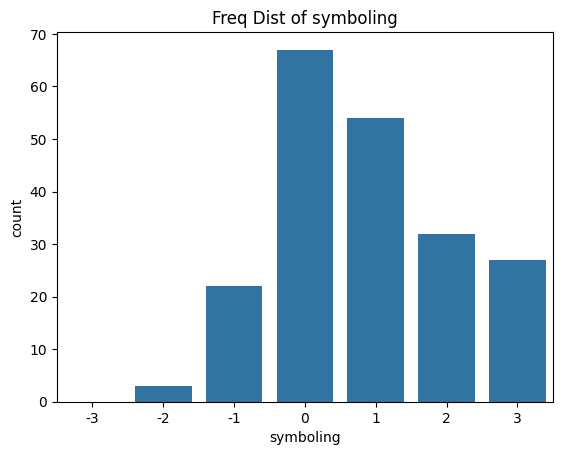

In [9]:
univariate_categorical(summary)

There are no cars with a symboling rating of -3, indicating either a lack of extremely safe or low-risk vehicles in this dataset or a different interpretation of this scale. The majority of vehicles (67) have a neutral symboling rating of 0, suggesting a balanced or average risk assessment for these cars. The next highest count is for a symboling rating of 1 (54 cars), followed by 2 and 3, each with 32 and 27 cars respectively. This distribution indicates a skew towards higher risk vehicles in the dataset.

<b>Numerical Feature: `normalized-losses`</b>

This is a continuous feature ranging from 65 to 256

In [10]:
automobile['normalized-losses'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: normalized-losses
Non-Null Count  Dtype  
--------------  -----  
164 non-null    float64
dtypes: float64(1)
memory usage: 1.7 KB


This feature has some missing values

In [11]:
automobile['normalized-losses'].describe()

count    164.000000
mean     122.000000
std       35.442168
min       65.000000
25%       94.000000
50%      115.000000
75%      150.000000
max      256.000000
Name: normalized-losses, dtype: float64

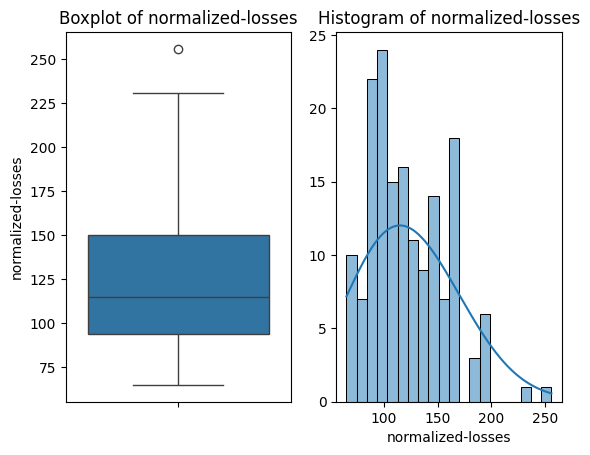

In [12]:
univariate_numerical(automobile['normalized-losses'])

It's evident that the data has a right-skewed distribution. The boxplot shows that the data has a wide spread, with the minimum normalized loss at 65 and the maximum at 256. The interquartile range, which is the difference between the 75th percentile (150) and the 25th percentile (94), is 56. This range represents the middle 50% of the data and shows that half of the vehicles have normalized losses between 94 and 150.

<b>Categorical Feature: `make`</b>

This feature represents the brand of automobiles in the dataset

In [13]:
automobile['make'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: make
Non-Null Count  Dtype 
--------------  ----- 
205 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


This feature has no missing values. Next, we will graph its distribution

In [14]:
summary = automobile['make'].value_counts()
summary

make
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: count, dtype: int64

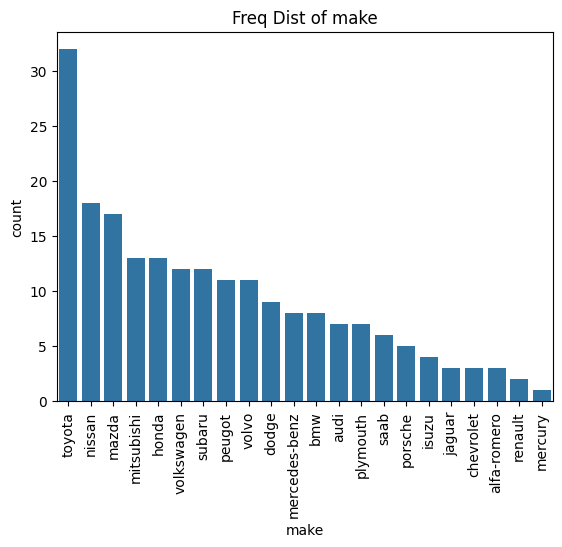

In [15]:
univariate_categorical(summary)

Toyota is the most represented make with 32 occurrences, suggesting a wide availability or popularity of Toyota models in the dataset. Nissan and Mazda are also well-represented, indicating a strong market presence.

The frequency of occurrence decreases progressively for other makes, with Mitsubishi, Honda, Volkswagen, Subaru, Peugeot, Volvo, and Dodge each accounting for 9 to 13 cars in the dataset. This pattern suggests a moderate representation of these makes.

Luxury and specialized brands like Mercedes-Benz, BMW, and Porsche have fewer instances. Several makes like Jaguar, Chevrolet, Alfa-Romeo, Renault, and Mercury have very few entries, with Mercury having the least at only one.

<b>Categorical Feature: `fuel-type`</b>

This is a binary feature which might take the value of either 'gas' or 'diesel'

In [16]:
automobile['fuel-type'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: fuel-type
Non-Null Count  Dtype 
--------------  ----- 
205 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


This feature has no missing values. Next, we will graph its distribution

In [17]:
summary = automobile['fuel-type'].value_counts()
summary

fuel-type
gas       185
diesel     20
Name: count, dtype: int64

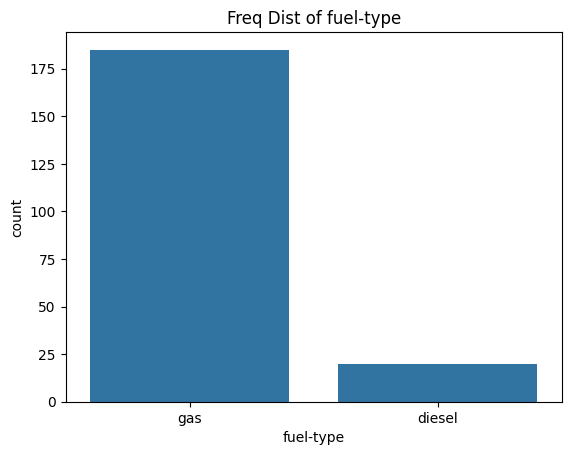

In [18]:
univariate_categorical(summary)

We can see significant occurrences for gas as a fuel type, with a total of 185 vehicles using gas. In contrast, only 20 vehicles are listed as using diesel.

<b>Categorical Feature: `aspiration`</b>

This is a binary feature which might take the value of either 'std' (standard) or 'tubor' (turbocharged)

In [19]:
automobile['aspiration'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: aspiration
Non-Null Count  Dtype 
--------------  ----- 
205 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


This feature has no missing values. Next, we will graph its distribution

In [20]:
summary = automobile['aspiration'].value_counts()
summary

aspiration
std      168
turbo     37
Name: count, dtype: int64

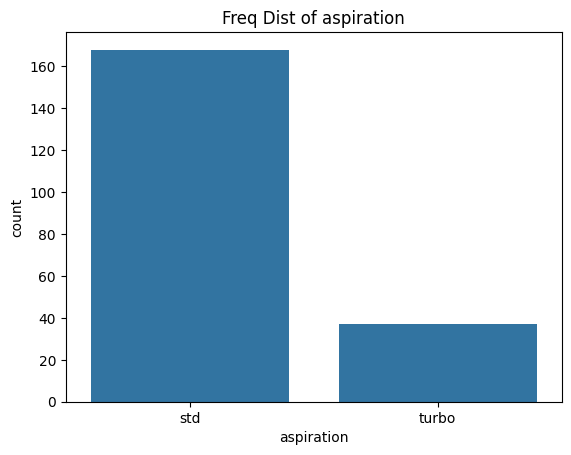

In [21]:
univariate_categorical(summary)

In this dataset, standard aspiration vehicles dominate, with a total count of 168, while turbocharged vehicles are much less common, with a count of 37.

<b>Categorical Feature: `num-of-doors`</b>

This is a binary feature which might take the value of either 'four' or 'two'

In [22]:
automobile['num-of-doors'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: num-of-doors
Non-Null Count  Dtype 
--------------  ----- 
203 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


There are some missing values in this feature

In [23]:
summary = automobile['num-of-doors'].value_counts().reindex(['two','four']).fillna(0)
summary

num-of-doors
two      89
four    114
Name: count, dtype: int64

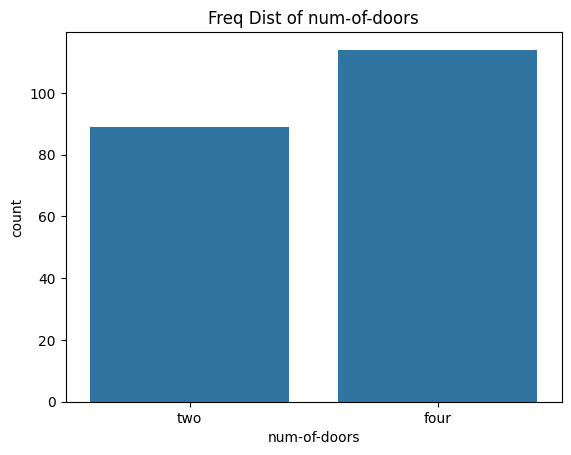

In [24]:
univariate_categorical(summary)


From the data provided, four-door vehicles are more common, with a count of 114, while two-door vehicles are slightly less common, with 89 instances.

<b>Categorical Feature: `body-style`</b>

This feature represents different body styles of vehicles in the dataset. It can be one of the categories: hardtop, wagon, sedan, hatchback, convertible

In [25]:
automobile['body-style'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: body-style
Non-Null Count  Dtype 
--------------  ----- 
205 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


This feature has no missing values. Next, we will graph its distribution

In [26]:
summary = automobile['body-style'].value_counts()
summary

body-style
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64

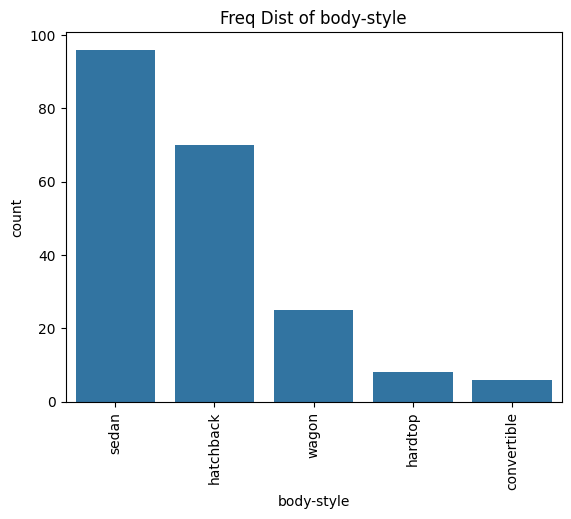

In [27]:
univariate_categorical(summary)

Sedans are the most common with 96 instances, followed by hatchbacks at 70. This suggests that these two body styles were the most popular or most commonly available. 

Wagons, with 25 instances, are less common, which might reflect a more niche market or a shift in consumer preference toward other styles. Hardtops and convertibles are the least common, with 8 and 6 occurrences respectively, which could be due to their typically higher price points, seasonal or regional practicality, or simply a lower production rate.

<b>Categorical Feature: `drive-wheels`</b>

This feature provides different drive-wheel configurations of automobiles within the dataset. It takes the value of 'fwd' (front-wheel drive), or 'rwd' (rear-wheel drive), or '4wd' (four-wheel drive)

In [28]:
automobile['drive-wheels'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: drive-wheels
Non-Null Count  Dtype 
--------------  ----- 
205 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


This feature has no missing values. Next, we will graph its distribution

In [29]:
summary = automobile['drive-wheels'].value_counts()
summary

drive-wheels
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64

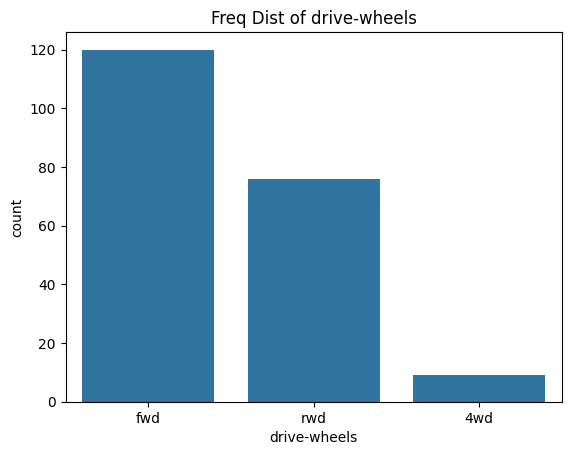

In [30]:
univariate_categorical(summary)

Front-wheel drive is the most prevalent with 120 instances, rear-wheel drive follows with 76, and four-wheel drive has the fewest at just 9.

<b>Categorical Feature: `engine-location`</b>

The feature provides the information of engine locations in the vehicles from the dataset. It can be either 'front' or 'rear'

In [31]:
automobile['engine-location'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: engine-location
Non-Null Count  Dtype 
--------------  ----- 
205 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


This feature has no missing values. Next, we will graph its distribution

In [32]:
summary = automobile['engine-location'].value_counts()
summary

engine-location
front    202
rear       3
Name: count, dtype: int64

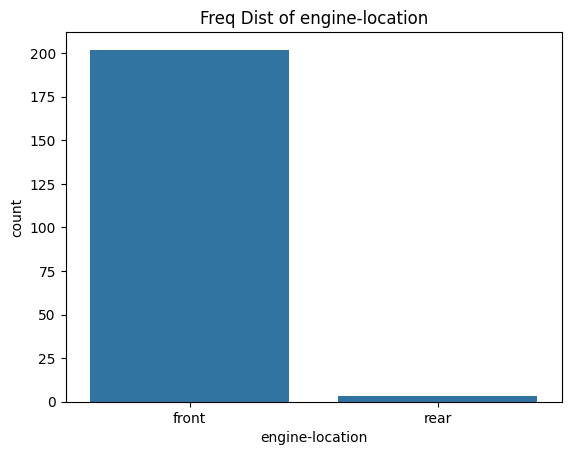

In [33]:
univariate_categorical(summary)

The overwhelming majority of vehicles have their engines located in the front, with 202 occurrences. Only 3 vehicles have rear-engine placement.

<b>Numerical Feature: `wheel-base`</b>

This feature represents the wheelbase measurements of vehicles within the dataset. It take a continuous value from 86.6 to 120.9

In [34]:
automobile['wheel-base'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: wheel-base
Non-Null Count  Dtype  
--------------  -----  
205 non-null    float64
dtypes: float64(1)
memory usage: 1.7 KB


This feature has no missing values. Next, we will graph its distribution

In [35]:
automobile['wheel-base'].describe()

count    205.000000
mean      98.756585
std        6.021776
min       86.600000
25%       94.500000
50%       97.000000
75%      102.400000
max      120.900000
Name: wheel-base, dtype: float64

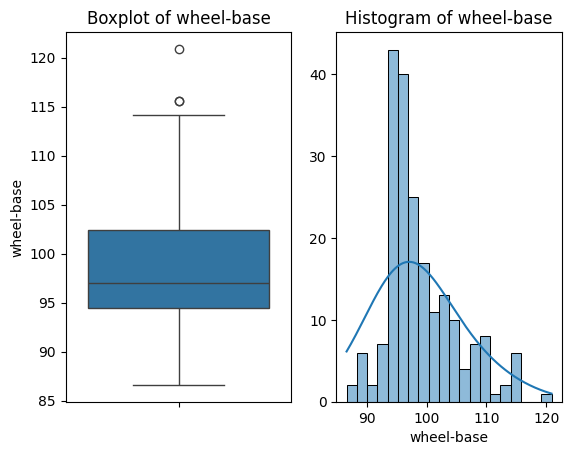

In [36]:
univariate_numerical(automobile['wheel-base'])

The data suggests that while most vehicles have a wheelbase that falls within a relatively normal range for passenger cars, there is a small number of vehicles with much longer wheelbases. These could be larger vehicles such as limousines or extended versions of SUVs or trucks. The presence of outliers indicates that these are not common. The spread of the data and the skewness suggest that while compact and medium-sized vehicles predominate, there is a significant variation in vehicle sizes, which could correlate with a variety of vehicle types and uses in the dataset.

<b>Numerical Feature: `length`</b>

This feature offers a detailed view of the vehicle lengths in the dataset. It takes a continuous value from 141.1 to 208.1

In [37]:
automobile['length'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: length
Non-Null Count  Dtype  
--------------  -----  
205 non-null    float64
dtypes: float64(1)
memory usage: 1.7 KB


This feature has no missing values. Next, we will graph its distribution

In [38]:
automobile['length'].describe()

count    205.000000
mean     174.049268
std       12.337289
min      141.100000
25%      166.300000
50%      173.200000
75%      183.100000
max      208.100000
Name: length, dtype: float64

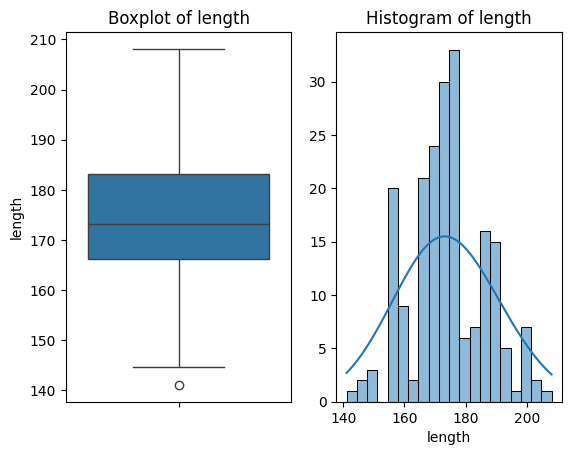

In [39]:
univariate_numerical(automobile['length'])

The data indicates that while there is a diversity in vehicle lengths, with a range from very short to very long, the majority of vehicles tend to be of average length. The presence of outliers and a slight skew towards longer lengths might reflect a subset of vehicles designed for specific uses or market segments, such as limousines, extended SUVs, or luxury sedans. 

<b>Numerical Feature: `width`</b>

This feature provides insight into the size characteristics of the vehicles in the dataset. It takes a continuous value from 60.3 to 72.3

In [40]:
automobile['width'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: width
Non-Null Count  Dtype  
--------------  -----  
205 non-null    float64
dtypes: float64(1)
memory usage: 1.7 KB


This feature has no missing values. Next, we will graph its distribution

In [41]:
automobile['width'].describe()

count    205.000000
mean      65.907805
std        2.145204
min       60.300000
25%       64.100000
50%       65.500000
75%       66.900000
max       72.300000
Name: width, dtype: float64

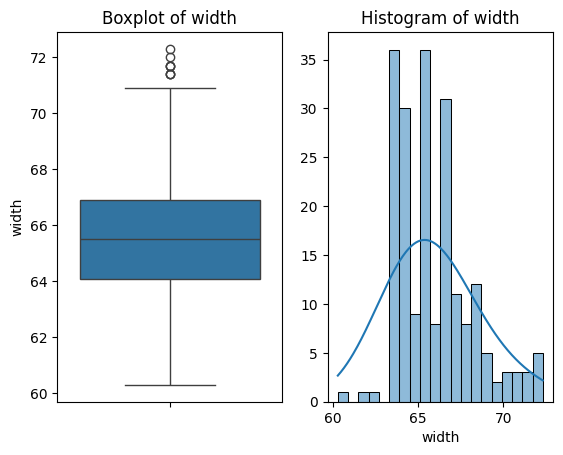

In [42]:
univariate_numerical(automobile['width'])

The data suggests a general standardization in vehicle width among the majority of vehicles, with a small number of exceptions that are significantly wider. The outliers suggest that while most manufacturers may adhere to a certain width range for practicality, there are some models that exceed this norm, possibly due to design and style considerations, or to accommodate additional features or capabilities. The relatively small standard deviation reinforces the idea of a standard vehicle width with minor variations across different models.

<b>Numerical Feature: `height`</b>

This feature exhibits the distribution of vehicle heights within the dataset. It ranges from 47.8 to 59.8

In [43]:
automobile['height'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: height
Non-Null Count  Dtype  
--------------  -----  
205 non-null    float64
dtypes: float64(1)
memory usage: 1.7 KB


This feature has no missing values. Next, we will graph its distribution

In [44]:
automobile['height'].describe()

count    205.000000
mean      53.724878
std        2.443522
min       47.800000
25%       52.000000
50%       54.100000
75%       55.500000
max       59.800000
Name: height, dtype: float64

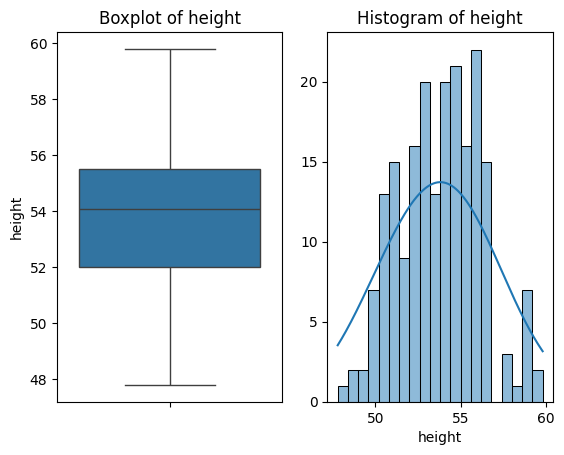

In [45]:
univariate_numerical(automobile['height'])

The data suggests that vehicle height in this dataset does not vary widely, with most vehicles having a height close to the average. This could indicate a standardization in the design of vehicles, with heights being consistent across the majority of models to fit a range of uses and preferences. The absence of outliers and a small standard deviation point towards a homogeneous group of vehicles regarding height, with few extremes on either the tall or short end of the spectrum.

<b>Numerical Feature: `curb-weight`</b>

This feature represents the curb weight of vehicles in the dataset. Its values range from 1488 to 4066

In [46]:
automobile['curb-weight'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: curb-weight
Non-Null Count  Dtype
--------------  -----
205 non-null    int64
dtypes: int64(1)
memory usage: 1.7 KB


This feature has no missing values. Next, we will graph its distribution

In [47]:
automobile['curb-weight'].describe()

count     205.000000
mean     2555.565854
std       520.680204
min      1488.000000
25%      2145.000000
50%      2414.000000
75%      2935.000000
max      4066.000000
Name: curb-weight, dtype: float64

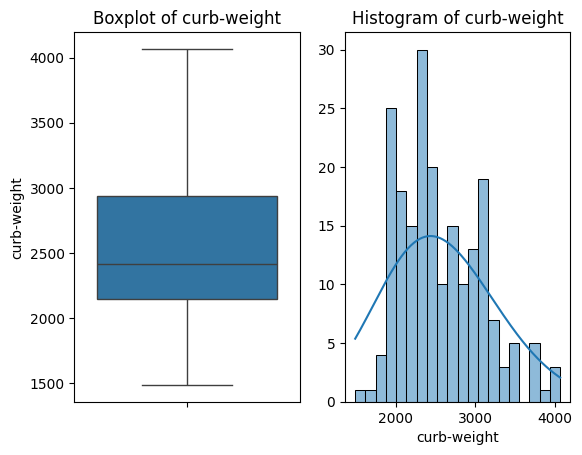

In [48]:
univariate_numerical(automobile['curb-weight'])

The curb weight distribution for the vehicles in the dataset is moderately varied with the majority centered around a mean of 2555.6 units. The boxplot reveals a median weight of 2414 units and no significant outliers, indicating a relatively standard weight range across the dataset. The histogram suggests a slight right skew, showing that while most vehicles are of average weight, there is a smaller number of heavier vehicles. This spread in weight reflects the diversity of vehicle types, from lighter compacts to heavier SUVs or trucks.

<b>Categorical Feature: `engine-type`</b>

This feature provides the information of engine type. It could be: ohc (Overhead Camshaft), ohcf (Overhead Camshaft Flat), ohcv (Overhead Camshaft Valve), dohc (Dual Overhead Camshaft), l (L-head), rotor (Rotary), dohcv (Dual Overhead Camshaft Valve).

In [49]:
automobile['engine-type'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: engine-type
Non-Null Count  Dtype 
--------------  ----- 
205 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


This feature has no missing values. Next, we will graph its distribution

In [50]:
summary = automobile['engine-type'].value_counts()
summary

engine-type
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64

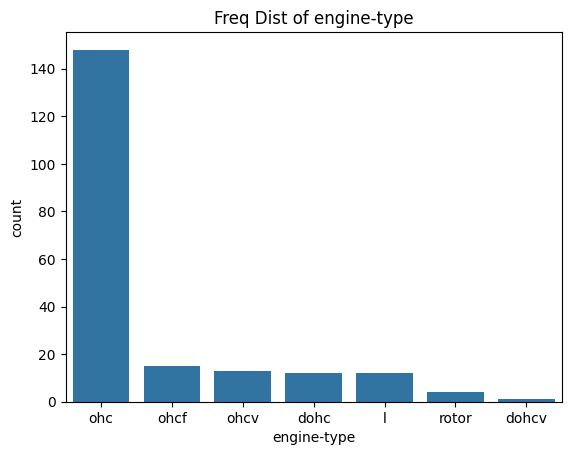

In [51]:
univariate_categorical(summary)

The histogram indicates that 'ohc' (Overhead Camshaft) is the most common engine type among the vehicles in the dataset, with a count of 148. Significantly less common are 'ohcf' (Overhead Camshaft Flat), 'ohcv' (Overhead Camshaft Valve), 'dohc' (Dual Overhead Camshaft), and 'l' (L-head), each with counts ranging from 12 to 15. Rare types include 'rotor' engines with 4 instances and 'dohcv' (Dual Overhead Camshaft Valve) with only 1 instance, indicating niche applications or limited usage. This distribution reflects the dominance of the 'ohc' engine type in the dataset, likely due to its widespread adoption for its balance of performance, efficiency, and manufacturing cost.

<b>Categorical Feature: `num-of-cylinders`</b>

This is a ordinal categorical feature. It takes one of the values (in the ascending order): 'two', 'three', 'four', 'five', 'six', 'eight', 'twelve'.

In [52]:
automobile['num-of-cylinders'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: num-of-cylinders
Non-Null Count  Dtype 
--------------  ----- 
205 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


This feature has no missing values. Next, we will graph its distribution

In [53]:
num_of_cylinders_order = ['two', 'three', 'four', 'five', 'six', 'eight', 'twelve']
summary = automobile['num-of-cylinders'].value_counts().reindex(num_of_cylinders_order).fillna(0)
summary

num-of-cylinders
two         4
three       1
four      159
five       11
six        24
eight       5
twelve      1
Name: count, dtype: int64

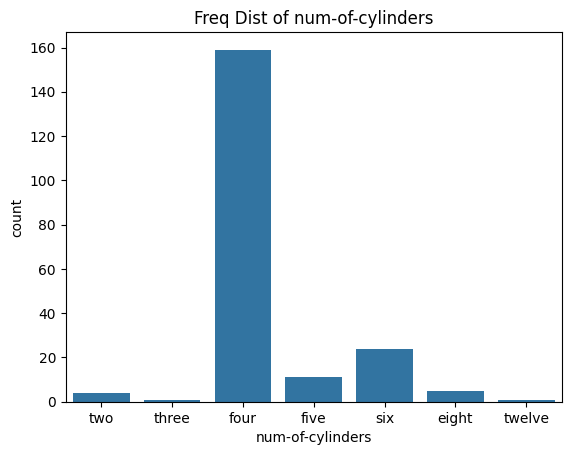

In [54]:
univariate_categorical(summary)

Four-cylinder engines dominate this dataset with 159 vehicles, indicating their widespread popularity, likely due to a balance of power and fuel efficiency suitable for a wide range of vehicles. Six-cylinder engines are next with 24 vehicles, offering a step up in performance. There are a smaller number of vehicles with five and eight cylinders, at 11 and 5 vehicles respectively, which could represent performance or luxury models. Very few vehicles have two or twelve cylinders, with 4 and 1 instances respectively, suggesting niche applications. Only one vehicle has a three-cylinder engine, highlighting its rarity. 

<b>Numerical Feature: `engine-size`</b>

This feature indicates the engine size of automobiles in the dataset. It takes a continuous value from 61 to 326

In [55]:
automobile['engine-size'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: engine-size
Non-Null Count  Dtype
--------------  -----
205 non-null    int64
dtypes: int64(1)
memory usage: 1.7 KB


This feature has no missing values. Next, we will graph its distribution

In [56]:
automobile['engine-size'].describe()

count    205.000000
mean     126.907317
std       41.642693
min       61.000000
25%       97.000000
50%      120.000000
75%      141.000000
max      326.000000
Name: engine-size, dtype: float64

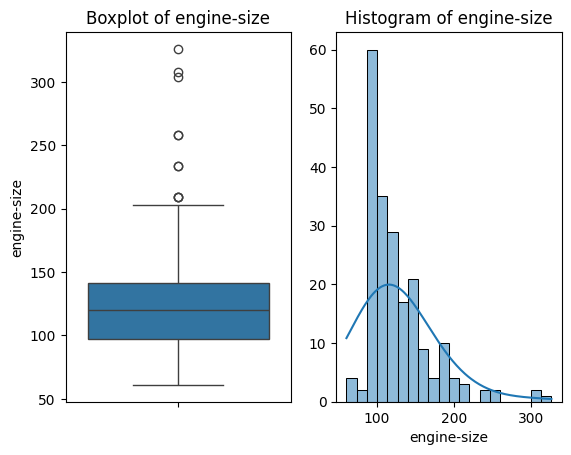

In [57]:
univariate_numerical(automobile['engine-size'])

Engine sizes center around the median of 120 units. The mean engine size is approximately 126.9 units, and there's a moderate standard deviation of 41.64 units, which suggests a diverse array of engine sizes. The histogram shows a right-skewed distribution with most engines being on the smaller size and fewer instances of larger engines, evidenced by a tail extending towards 326 units, which is the maximum. Outliers in the boxplot suggest there are some vehicles with significantly larger engine sizes than the average, pointing to the presence of high-performance or commercial vehicles within the dataset.

<b>Categorical Feature: `fuel-system`</b>

This is a nominal categorical feature that provides the information about fuel system type of automobiles in the dataset. It takes one of the categories: '1bbl' (Single-Barrel Carburetor), '2bbl' (Two-Barrel Carburetor), '4bbl' (Four-Barrel Carburetor), 'idi' (Indirect Injection), 'mfi' (Mechanical Fuel Injection), 'mpfi' (Multi-Point Fuel Injection), 'spdi' (Single-Point Fuel Injection or Throttle Body Injection), 'spfi' (Sequential Port Fuel Injection)

In [58]:
automobile['fuel-system'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: fuel-system
Non-Null Count  Dtype 
--------------  ----- 
205 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


This feature has no missing values. Next, we will graph the frequency of each category

In [59]:
summary = automobile['fuel-system'].value_counts()
summary

fuel-system
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64

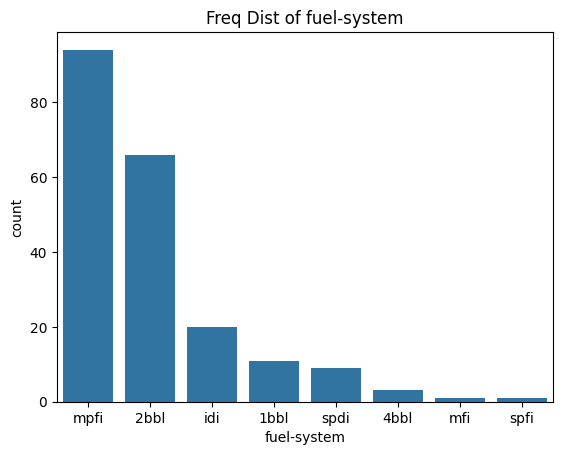

In [60]:
univariate_categorical(summary)

The 'mpfi' (Multi-Point Fuel Injection) system is the most common with 94 instances, indicative of its prevalence in providing efficient and precise fuel delivery. The '2bbl' (Two-Barrel Carburetor) comes in second with 66 counts, representing older or more basic fuel delivery technology. 'idi' (Indirect Injection), typically used in diesel engines, has 20 instances, while '1bbl' (Single-Barrel Carburetor) and 'spdi' (Single-Point Fuel Injection or Throttle Body Injection) are less common with 11 and 9 counts, respectively. '4bbl' (Four-Barrel Carburetor) systems are rare with only 3 occurrences, and 'mfi' (Mechanical Fuel Injection) and 'spfi' (Sequential Port Fuel Injection) each have just one instance, suggesting they are either outdated or specialized systems.

<b>Numerical Feature: `bore`</b>

This feature provides the information regarding the engine sizes present in the dataset. It take a continuous value ranging from 2.54 to 3.94

In [61]:
automobile['bore'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: bore
Non-Null Count  Dtype  
--------------  -----  
201 non-null    float64
dtypes: float64(1)
memory usage: 1.7 KB


This feature has some missing values. Next, we will graph the distribution of its value

In [62]:
automobile['bore'].describe()

count    201.000000
mean       3.329751
std        0.273539
min        2.540000
25%        3.150000
50%        3.310000
75%        3.590000
max        3.940000
Name: bore, dtype: float64

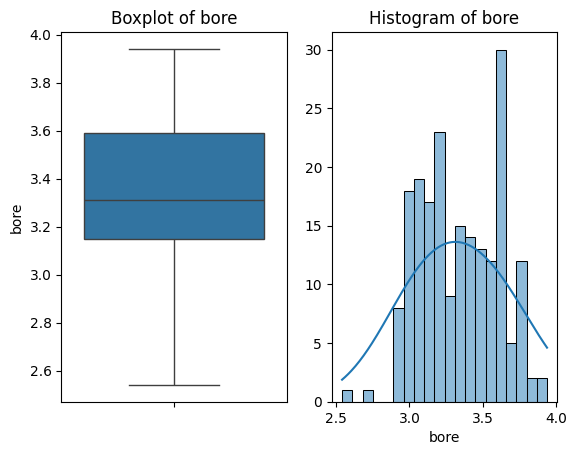

In [63]:
univariate_numerical(automobile['bore'])

The median bore size is 3.31 units, and most bore sizes cluster within the interquartile range from 3.15 to 3.59 units, indicating a moderate variation in engine cylinder diameters. The mean bore size is slightly higher at 3.33 units, suggesting a small skew towards larger bores. The histogram shows a fairly normal distribution with a concentration around the mean.

<b>Numerical Feature: `stroke`</b>

This feature prodive the values of engine stroke, which is the distance the piston travels within the cylinder. It takes a continuous value from 2.07 to 4.17

In [64]:
automobile['stroke'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: stroke
Non-Null Count  Dtype  
--------------  -----  
201 non-null    float64
dtypes: float64(1)
memory usage: 1.7 KB


This feature has some missing values. We will graph the distribution of its values

In [65]:
automobile['stroke'].describe()

count    201.000000
mean       3.255423
std        0.316717
min        2.070000
25%        3.110000
50%        3.290000
75%        3.410000
max        4.170000
Name: stroke, dtype: float64

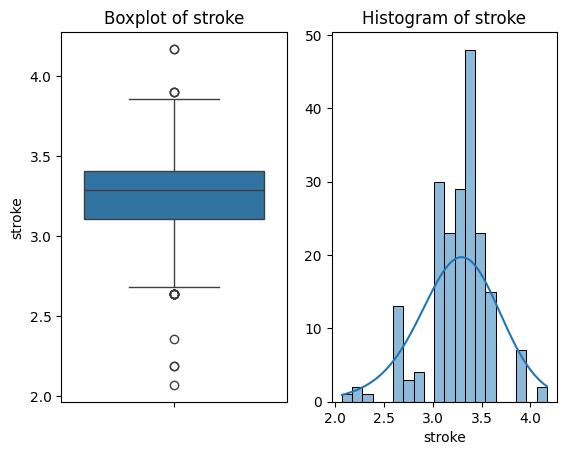

In [66]:
univariate_numerical(automobile['stroke'])

The median stroke value is 3.29 units. The mean stroke is slightly less at 3.26 units, and there's a standard deviation of 0.32 units, indicating some variability but generally centered around the mean. There are several outliers indicated in the boxplot, particularly on the lower end, with the minimum stroke at 2.07 units and some on the higher end with the maximum stroke at 4.17 units.

<b>Numerical Feature: `compression-ratio`</b>

This feature describes the compression ratio across different engines in the dataset. It ranges continuously from 7 to 23

In [67]:
automobile['compression-ratio'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: compression-ratio
Non-Null Count  Dtype  
--------------  -----  
205 non-null    float64
dtypes: float64(1)
memory usage: 1.7 KB


The feature has no missing values. We will explore the distribution of its values

In [68]:
automobile['compression-ratio'].describe()

count    205.000000
mean      10.142537
std        3.972040
min        7.000000
25%        8.600000
50%        9.000000
75%        9.400000
max       23.000000
Name: compression-ratio, dtype: float64

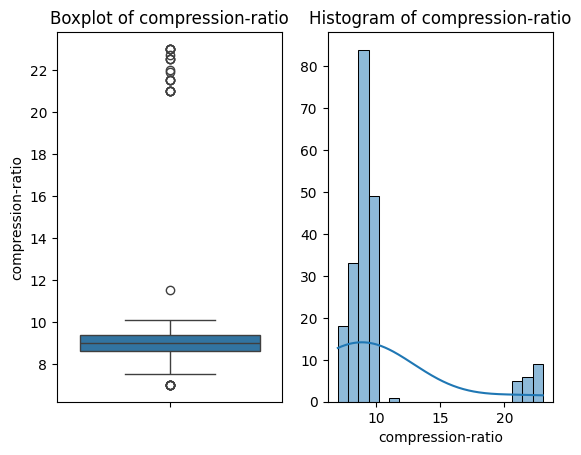

In [69]:
univariate_numerical(automobile['compression-ratio'])

The boxplot and histogram for the compression ratio show most vehicles in the dataset have a ratio clustered around a median of 9.0, with a mean slightly higher at 10.14.

Several outliers are above the upper quartile, which is at 9.4, with the maximum compression ratio being quite high at 23. These outliers could represent high-performance or diesel engines, which typically have higher compression ratios.

<b>Numerical Feature: `horsepower`</b>

This feature provides the information about horsepower across automobiles in the dataset. It can take a continuous value from 48 to 288

In [70]:
automobile['horsepower'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: horsepower
Non-Null Count  Dtype  
--------------  -----  
203 non-null    float64
dtypes: float64(1)
memory usage: 1.7 KB


Some missing values can be found in the feature values. We will graph the distribution of the feature

In [71]:
automobile['horsepower'].describe()

count    203.000000
mean     104.256158
std       39.714369
min       48.000000
25%       70.000000
50%       95.000000
75%      116.000000
max      288.000000
Name: horsepower, dtype: float64

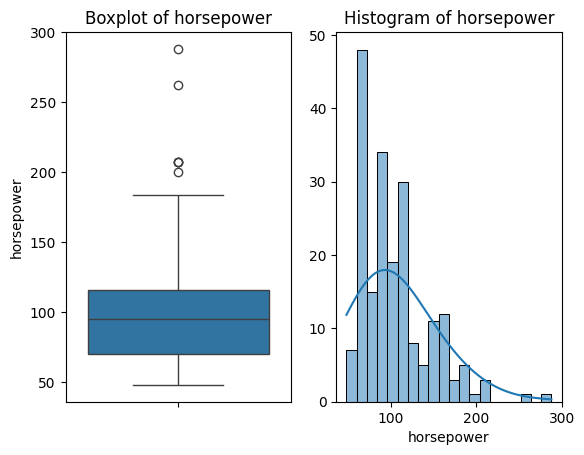

In [72]:
univariate_numerical(automobile['horsepower'])

The boxplot and histogram for horsepower in the dataset show a median of 95 units, with the majority of vehicles having horsepower figures between 70 and 116 units. The mean horsepower is slightly higher at 104.3, reflecting the impact of some high-power vehicles, as indicated by the right-skewed histogram and a few outliers reaching up to a maximum of 288 units. 

This suggests the dataset includes a variety of vehicles, from low-power economy models to high-performance sports cars. The standard deviation of 39.7 units further underscores the broad range of engine power outputs present.

<b>Numerical Feature: `peak-rpm`</b>

This feature provides the value of peak engine revolutions per minute (RPM) for the vehicles in the dataset. It can be any real number between 4150 and 6600

In [73]:
automobile['peak-rpm'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: peak-rpm
Non-Null Count  Dtype  
--------------  -----  
203 non-null    float64
dtypes: float64(1)
memory usage: 1.7 KB


This feature has some missing values. We will graph the distribution of its values

In [74]:
automobile['peak-rpm'].describe()

count     203.000000
mean     5125.369458
std       479.334560
min      4150.000000
25%      4800.000000
50%      5200.000000
75%      5500.000000
max      6600.000000
Name: peak-rpm, dtype: float64

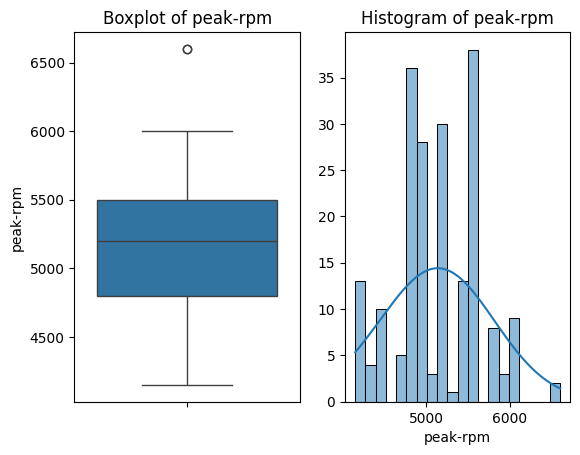

In [75]:
univariate_numerical(automobile['peak-rpm'])

The median peak RPM is 5200, with half of the vehicles having a higher peak RPM and the other half lower. The mean is slightly less at 5125 RPM, and the standard deviation of 479 RPM indicates a moderate spread around the mean. 

The histogram shows a distribution centered around 5000 to 5500 RPM, with fewer vehicles achieving higher RPMs, as evidenced by the tail to the right. A few outliers exist above the upper quartile, with the maximum RPM reaching 6600, highlighting some high-performance engines in the dataset.

<b>Numerical Feature: `city-mpg`</b>

City miles per gallon (city-mpg) indicates the fuel efficiency of vehicles in urban settings from the dataset. It can take any continuous values ranging from 13 to 49

In [76]:
automobile['city-mpg'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: city-mpg
Non-Null Count  Dtype
--------------  -----
205 non-null    int64
dtypes: int64(1)
memory usage: 1.7 KB


This feature has no missing values. Let's look at its disbution

In [77]:
automobile['city-mpg'].describe()

count    205.000000
mean      25.219512
std        6.542142
min       13.000000
25%       19.000000
50%       24.000000
75%       30.000000
max       49.000000
Name: city-mpg, dtype: float64

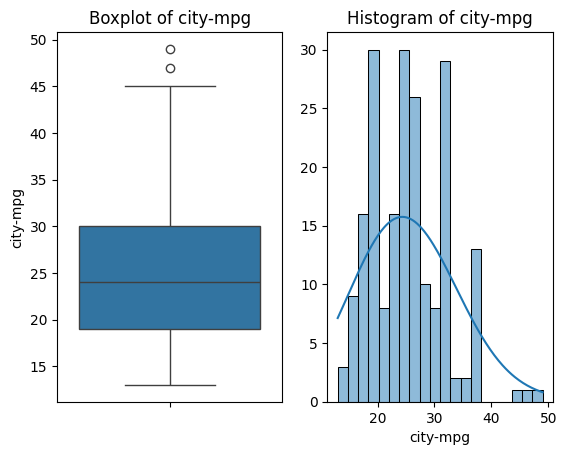

In [78]:
univariate_numerical(automobile['city-mpg'])

The median city mpg is 24, and the data is quite spread out as shown by the standard deviation of 6.54 mpg, with a mean slightly higher at 25.22 mpg. The majority of vehicles achieving between 19 to 30 mpg in the city, and a few high-efficiency outliers reaching up to 49 mpg.

<b>Numerical Feature: `highway-mpg`</b>

Highway miles per gallon (highway-mpg) indicates the fuel efficiency of vehicles on highways. It can take any continuous values ranging from 16 to 54

In [79]:
automobile['highway-mpg'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: highway-mpg
Non-Null Count  Dtype
--------------  -----
205 non-null    int64
dtypes: int64(1)
memory usage: 1.7 KB


The feature has no missing values

In [80]:
automobile['highway-mpg'].describe()

count    205.000000
mean      30.751220
std        6.886443
min       16.000000
25%       25.000000
50%       30.000000
75%       34.000000
max       54.000000
Name: highway-mpg, dtype: float64

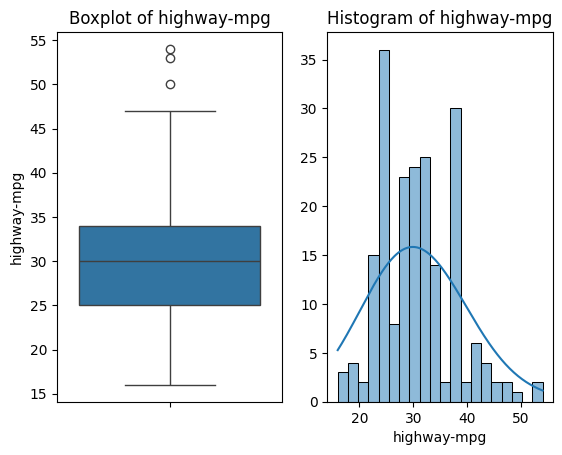

In [81]:
univariate_numerical(automobile['highway-mpg'])

The dataset's highway mpg data, represented in the boxplot and histogram, shows that vehicles tend to have higher fuel efficiency on the highway compared to city driving. The median highway mpg is 30, and the mean is slightly higher at 30.75 mpg. The standard deviation of 6.89 mpg points to a diverse range of fuel efficiency. 

The histogram indicates a somewhat right-skewed distribution, with a few vehicles achieving very high highway mpg, up to a maximum of 54 mpg. This information suggests that while most vehicles have moderate highway efficiency, there are outliers that are exceptionally fuel-efficient.

<b>Numerical Feature: `price`</b>

This feature provides vehicle prices in the dataset. It can take any continuous values ranging from 5118 to 45400

In [82]:
automobile['price'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: price
Non-Null Count  Dtype  
--------------  -----  
201 non-null    float64
dtypes: float64(1)
memory usage: 1.7 KB


There are some missing values for 'price' information. Let's inspect the distribution of the data

In [83]:
automobile['price'].describe()

count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64

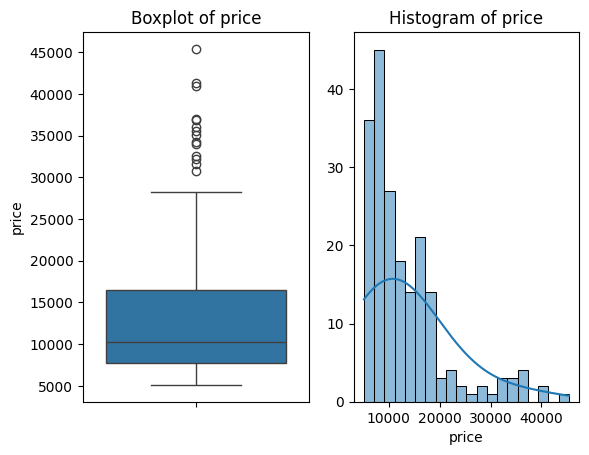

In [84]:
univariate_numerical(automobile['price'])

The median price is $10,295, while the mean is higher at $13,207, indicating a right-skewed distribution with a range of vehicle prices. The standard deviation is quite large at $7,947, showing substantial variability in pricing. The histogram suggests most vehicles are priced below $20,000, with a tail extending towards more expensive vehicles, up to the maximum price of $45,400. There are several outliers indicating a few vehicles are priced significantly higher than the median. This reflects a wide range of vehicle options, from budget-friendly to luxury models.

### 2.2. Bivariate Analysis

We need some graphical functions for bivariate analysis.

In [85]:
def bivariate_numerical_numerical(data: pd.DataFrame, x: str, y: str):
    """
    Create a bivariate scatter plot using Seaborn to visualize the relationship between two numerical variables.
    
    Parameters:
    - data: pd.DataFrame
        The Pandas DataFrame containing the data.
    - x: str
        The name of the column in the DataFrame to be used as the x-axis in the scatter plot.
    - y: str
        The name of the column in the DataFrame to be used as the y-axis in the scatter plot.
    
    The function plots a scatter plot where each point represents an observation with its x and y values.
    """
    # Create a new figure for plotting.
    plt.figure()
    # Plot a scatter plot with the specified columns as the x and y axes.
    # `linewidth=0` removes the outline of the markers.
    sns.scatterplot(x=x, y=y, data=data, linewidth=0)
    # Set the title of the plot. The title indicates the variables being compared.
    plt.title(f'{x} vs. {y}')
    # Display the plot.
    plt.show()

In [86]:
def bivariate_categorical_numerical(
    data: pd.DataFrame, 
    x: str, 
    y: str,
    x_order: list,
):
    """
    Create a bivariate boxplot using Seaborn to visualize the distribution of a numerical variable
    across different categories of a categorical variable.
    
    Parameters:
    - data: pd.DataFrame
        The Pandas DataFrame containing the data.
    - x: str
        The name of the categorical column to be used as the x-axis in the boxplot.
    - y: str
        The name of the numerical column to be used as the y-axis in the boxplot.
    - x_order: list
        The specific order in which to display the categories along the x-axis.
    
    The function plots a boxplot where each box represents the distribution of the numerical
    variable within a category, showing the median, quartiles, and potential outliers.
    """
    
    # Create a boxplot with Seaborn. 'data=data' specifies the source DataFrame,
    # 'x=x' sets the categorical variable for the x-axis,
    # 'y=y' sets the numerical variable for the y-axis,
    # 'order=x_order' ensures the categories on the x-axis are displayed according to the given order.
    sns.boxplot(data=data, x=x, y=y, order=x_order)
    # Set the title of the boxplot with the names of the categorical and numerical variables.
    plt.title(f'{x} vs. {y}')
    # Display the plot.
    plt.show()

In [87]:
def bivariate_categorical_categorical(
    data: pd.DataFrame, 
    x: str, 
    hue: str, 
    x_order: list,
    hue_order: list
):
    """
    Create a Seaborn categorical plot to visualize the frequency of categories in a bivariate manner,
    with one categorical variable broken down by another categorical variable.
    
    Parameters:
    - data: pd.DataFrame
        The Pandas DataFrame containing the data.
    - x: str
        The name of the main categorical column for the x-axis.
    - hue: str
        The name of the secondary categorical column used to group the bars and add another dimension to the plot.
    - x_order: list
        The order in which the categories of the main categorical variable should be displayed on the x-axis.
    - hue_order: list
        The order in which the categories of the secondary categorical variable should be displayed within each main category.
    
    This function will produce a count plot with bars representing the counts of the 'x' categories,
    and each bar will be colored in segments to represent the distribution of the 'hue' categories within each 'x' category.
    """
    
    # Create a count plot using Seaborn's catplot function.
    # 'kind="count"' specifies a count plot,
    # 'x=x' sets the main categorical variable for the x-axis,
    # 'hue=hue' sets the secondary categorical variable for coloring the bars,
    # 'order=x_order' arranges the bars according to the specified order for 'x',
    # 'hue_order=hue_order' arranges the color segments according to the specified order for 'hue',
    # 'height' and 'aspect' control the size and shape of the plot.
    ax = sns.catplot(
        data=data, 
        kind="count", 
        x=x, 
        hue=hue,
        order=x_order,
        hue_order=hue_order,
        height=4, 
        aspect=7/4  # Aspect ratio of 7:4, can be adjusted for different size ratios
    )
    # Set the title of the plot using the 'x' and 'hue' variables.
    plt.title(f'Count of {x} by {hue}')
    # Display the plot.
    plt.show()

We are all set! Let's inspect some relationships

`horsepower` (numerical) vs. `price` (numerical):

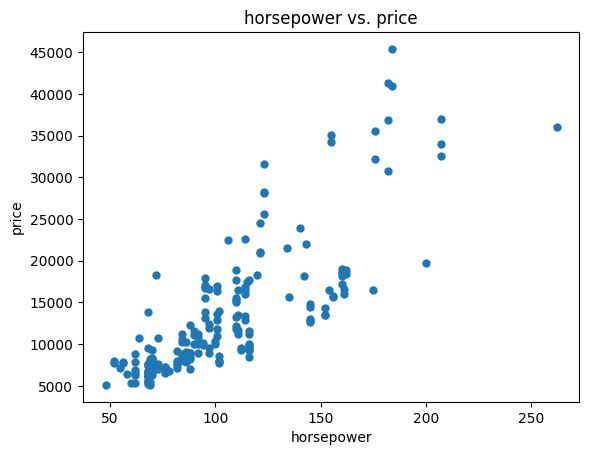

In [88]:
bivariate_numerical_numerical(data=automobile,x='horsepower',y='price')

The scatter plot illustrates the relationship between horsepower and price for the vehicles in the dataset. The plot suggests a positive correlation between these two variables, where vehicles with higher horsepower tend to be more expensive. There is a wide distribution of prices at lower horsepower levels, but as horsepower increases, the price range also increases and becomes more spread out. 

There are a few outliers, particularly vehicles with high horsepower that are significantly more expensive. This pattern supports the notion that performance is often priced at a premium in the automobile market.

`num-of-cylinders` (categorical) vs. `curb-weight` (numerical):

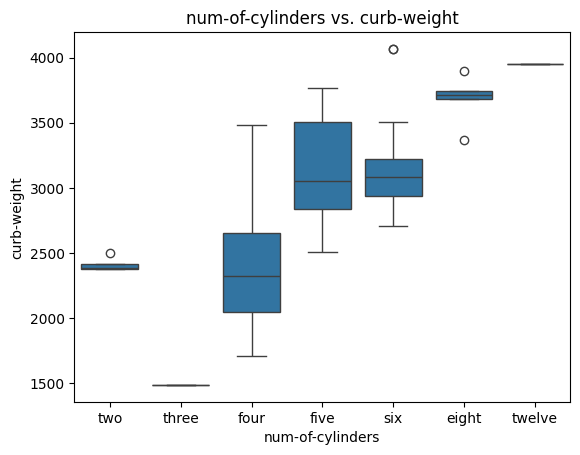

In [89]:
bivariate_categorical_numerical(
    data=automobile,
    x='num-of-cylinders',
    y='curb-weight',
    x_order=num_of_cylinders_order
)

The boxplot compares curb weight across different numbers of engine cylinders. Generally, there's a trend showing that vehicles with more cylinders tend to be heavier, which is likely due to larger engine sizes and possibly more luxurious or performance-oriented vehicle models that come with heavier engines.

For two and three-cylinder engines, the data points are quite sparse, suggesting these configurations are uncommon within this dataset. Four-cylinder engines show a wide range of curb weights but are centered on a lower median, aligning with typical consumer cars that balance efficiency and practicality. Five and six-cylinder engines have a higher median curb weight, suggesting mid-range performance and possibly larger body vehicles. Vehicles with eight cylinders have a higher median weight and greater variability, indicating they are likely to be high-performance or luxury vehicles. The single twelve-cylinder vehicle outlier indicates a particularly heavy vehicle, which would be expected with the large engine size typical of luxury or exotic cars.

The spread within the categories, especially with six and eight cylinders, as well as the outliers, suggest that while cylinder count is an indicator of weight, there's substantial diversity within each category, influenced by factors such as vehicle type, build materials, and additional features.

`body-style` (categorical) vs. `drive-wheels` (categorical):

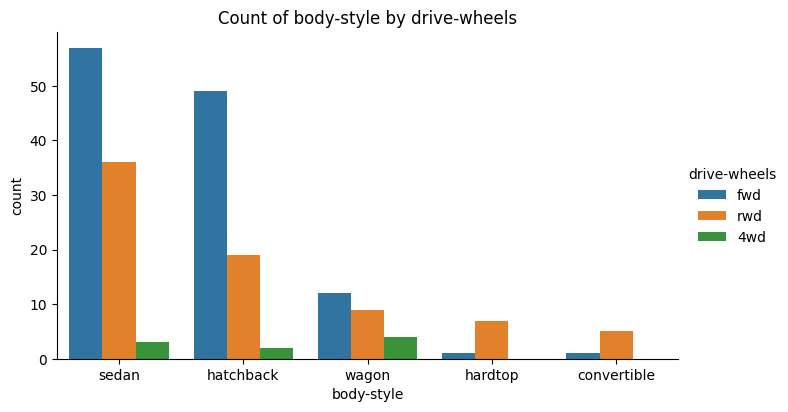

In [90]:
bivariate_categorical_categorical(
    data=automobile,
    x='body-style',
    hue='drive-wheels',
    x_order=['sedan','hatchback','wagon','hardtop','convertible'],
    hue_order=['fwd','rwd','4wd']
)

The bar graph presents the count of different body styles of vehicles categorized by their drive-wheel configuration. Sedans and hatchbacks are the most common body styles for both front-wheel drive (fwd) and rear-wheel drive (rwd) configurations, with fwd being particularly prevalent among hatchbacks. Four-wheel drive (4wd) is less common overall, but it appears to be more frequent in the wagon body style compared to others. 

Convertibles are predominantly rear-wheel drive, which is often preferred for sportier cars due to its handling characteristics. Hardtops are the least common body style across all drive types, with fwd and rwd being more common than 4wd. This distribution can indicate consumer preferences and the functional design choices made by manufacturers for different vehicle uses.

### 2.3. Multivariate Analysis

We need to define a graphical function for multivariate analysis.

In [91]:
def multivariate(
    data: pd.DataFrame,
    x: str,
    y: str,
    hue: str,
    x_order: list,
    hue_order: list,
):
    """
    Create a multivariate Seaborn bar chart that shows the relationship between two categorical variables
    and one numerical variable.
    
    Parameters:
    - data: pd.DataFrame
        The DataFrame containing the data.
    - x: str
        The name of the primary categorical variable to be plotted on the x-axis.
    - y: str
        The name of the numerical variable to be plotted on the y-axis.
    - hue: str
        The name of the secondary categorical variable that will be used for color coding the bars.
    - x_order: list
        The order in which the categories of the primary categorical variable should be displayed on the x-axis.
    - hue_order: list
        The order in which the categories of the secondary categorical variable should be displayed within each primary category.
    
    This function will generate a bar chart with each primary category on the x-axis and the mean (or other aggregate) of the numerical
    variable on the y-axis, with the bars grouped by the primary category and color-coded by the secondary category.
    """
    
    # Create the catplot bar chart using Seaborn.
    ax = sns.catplot(
        data=data,  # Pass the DataFrame.
        x=x,  # Set the primary categorical variable for the x-axis.
        y=y,  # Set the numerical variable for the y-axis.
        hue=hue,  # Set the secondary categorical variable for color coding.
        kind='bar',  # Specify the kind of plot as 'bar'.
        order=x_order,  # Set the order of categories for the x-axis.
        hue_order=hue_order,  # Set the order of categories for the color coding.
        height=5,  # Specify the height of the plot.
        aspect=2,  # Specify the aspect ratio of the plot.
    )
    # Set the title of the plot.
    plt.title(f'{x} vs. {hue} vs. {y}')
    # Display the plot.
    plt.show()

`body-style` (categorical) vs. `fuel-type` (categorical) vs. `price` (numerical):

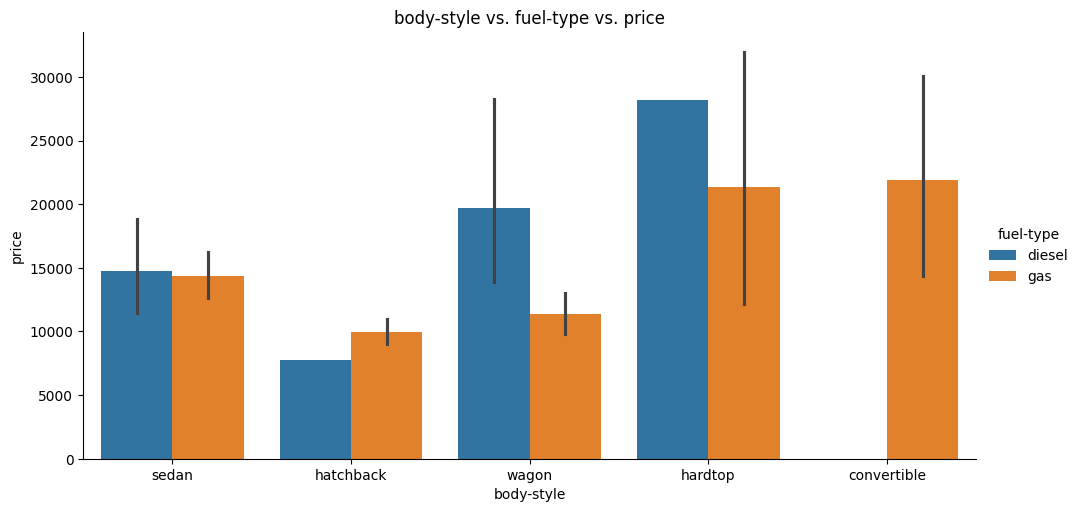

In [92]:
multivariate(
    data=automobile,
    x='body-style',
    hue='fuel-type',
    y='price',
    x_order=['sedan','hatchback','wagon','hardtop','convertible'],
    hue_order=['diesel','gas'],
)

The bar chart compares the average price of vehicles by body style and fuel type. It shows that, generally, diesel vehicles are priced higher than gasoline vehicles within the same body style category. Hardtops and convertibles, regardless of fuel type, tend to be higher-priced than sedans, hatchbacks, and wagons. 

It also appears that the variability in price, as indicated by the error bars, is quite significant in some categories, particularly in wagon, hardtops, and convertibles. This suggests the data scarity within those body styles. The chart implies that body style and fuel type together can have a considerable impact on vehicle pricing.

`symboling` (categorical) vs. `fuel-type` (categorical) vs. `normalized-losses` (numerical):

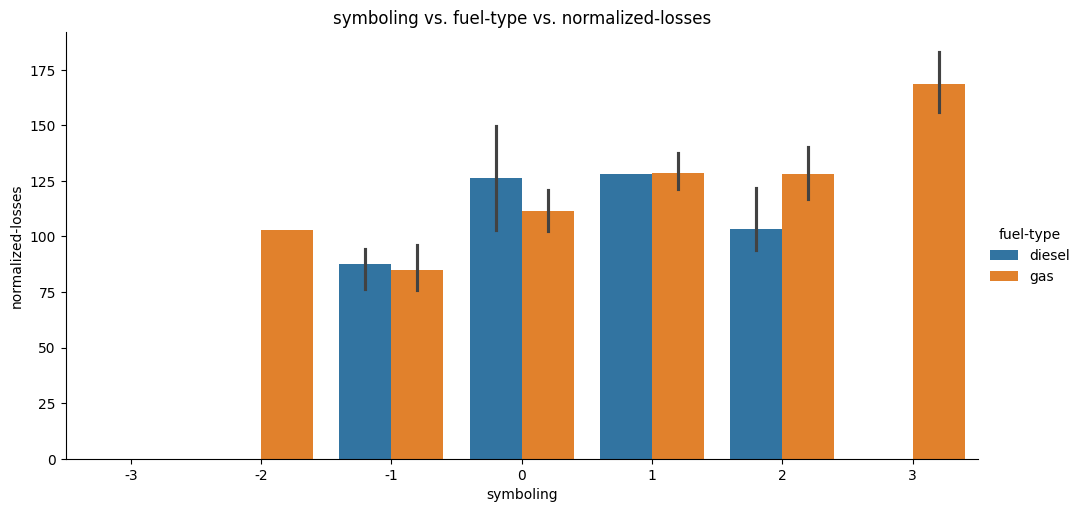

In [93]:
multivariate(
    data=automobile,
    x='symboling',
    hue='fuel-type',
    y='normalized-losses',
    x_order=symboling_order,
    hue_order=['diesel','gas'],
)

The bar chart displays normalized losses, which typically represent insurance loss payment per insured vehicle year, across different symboling ratings for both diesel and gasoline vehicles. Symboling is an indicator of risk, with higher values often indicating higher risk and potentially higher insurance costs.

From the chart, we can observe that:
- For both fuel types, the trend indicates an increase in normalized losses as the symboling rating increases.
- Diesel and gasoline vehicles seem to have the same ranges of normalized losses across different symboling ratings (Diesel vehicles are absent for -3, -2, and 3 symboling ratings. Gasoline vehicles are absent for -3 symboling rating)
- The variability in normalized losses, as suggested by the error bars, seems to increase with the symboling rating, particularly for gasoline vehicles, which implies the lack of data.



## Part 2: Data Preparation & Feature Engineering

### Question 1:

Based on the provided data description, all numerical features should be scaled to a common range and transformed to approximate a normal distribution before being used in machine learning algorithms. This is especially important for features that are right-skewed, as linear regression and many other models assume normal distribution of the input variables. Here are the features to consider:

- `price`: Ranges from 5118 to 45400. This feature is right-skewed and needs scaling and transformation.
- `highway-mpg` and `city-mpg`: These features, with ranges of 16 to 54 and 13 to 49 respectively, are right-skewed. Scaling and transformation will help normalize their distribution.
- `peak-rpm`: Varies from 4150 to 6600 and is right-skewed, requiring appropriate scaling and transformation.
- `horsepower`: Ranges from 48 to 288 and is right-skewed. Scaling and transformation are necessary for normalization.
- `compression-ratio`: With a range from 7 to 23, this feature is also right-skewed and would benefit from scaling and transformation.
- `stroke` and `bore`: These features have ranges of 2.07 to 4.17 and 2.54 to 3.94, respectively, and are right-skewed. They require scaling and transformation.
- `engine-size`: Ranging from 61 to 326, this feature is right-skewed and needs to be scaled and transformed.
- `curb-weight`: With a range from 1488 to 4066, curb weight is right-skewed and should be processed accordingly.
- `height`, `width`, `length`, `wheel-base`: are less likely to be skewed but still require appropriate scaling.
- `normalized-losses`: Ranges from 65 to 256 and is right-skewed, necessitating scaling and transformation.

For features that are right-skewed, applying transformations like logarithmic, square root, or Box-Cox can help in approximating a normal distribution. This preprocessing step is crucial because features closer to normal distribution often lead to better performance in many machine learning algorithms, including linear regression, by meeting the assumption of linearity and homoscedasticity.

Also, numerical features should be scaled to a common range to ensure fast convergence of all gradient-based machine learning algorithms. A uniform range for numerical features is even a prerequisite for many algorithms that involve distance calculations, such as KNN, K-Means clustering, DBSCAN, PCA, SVM. Since the downstream tasks that involve model exploration and hyperparameter tunning will definitely necessitate experimenting with various types of models, scaling all numerical features becomes a compelling strategy to streamline the model experimentation process.

### Question 2:

I'd like to rerun the relevant code snippet from EDA here:

In [94]:
automobile['num-of-doors'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: num-of-doors
Non-Null Count  Dtype 
--------------  ----- 
203 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


In [95]:
automobile['price'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: price
Non-Null Count  Dtype  
--------------  -----  
201 non-null    float64
dtypes: float64(1)
memory usage: 1.7 KB


As we can see, there are 205 entries but `num-of-doors` and `price` only have 203 and 201 non-null values, respectively. Hence, `num-of-doors` has 2 missing values and `price` has 4 missing values. We will do the imputation on each of the feature.

#### 2.1. Categorical Feature: `num-of-doors`

`num-of-doors` is a ordinal categorical feature which can take one of the value: 'two' or 'four'. To find the most appropriate values of two missing data points, we can study the relationship between `num-of-doors` and `length`.

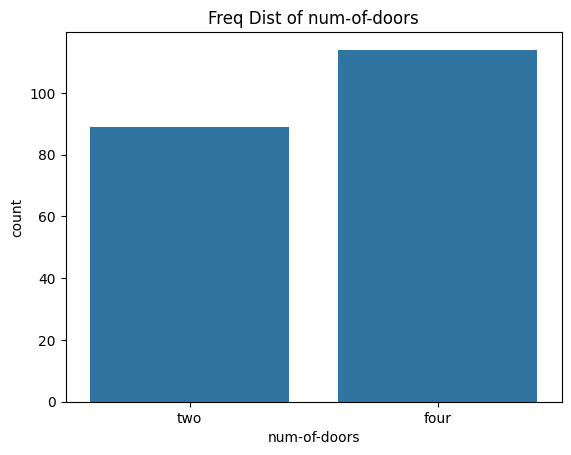

In [96]:
# Distribution of `num-of-doors`
summary = automobile['num-of-doors'].value_counts().reindex(['two','four']).fillna(0)
univariate_categorical(summary)

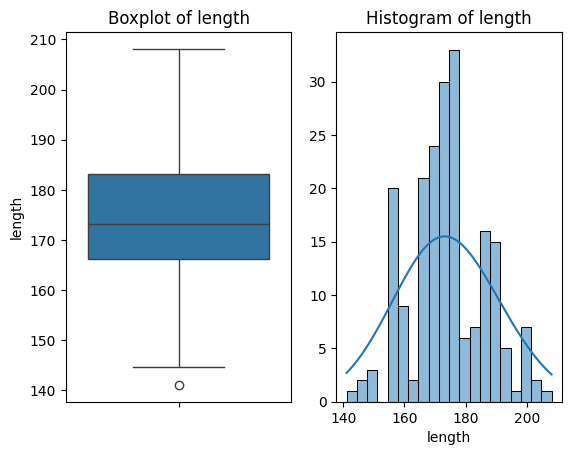

In [97]:
# Distribution of `length`
univariate_numerical(automobile['length'])

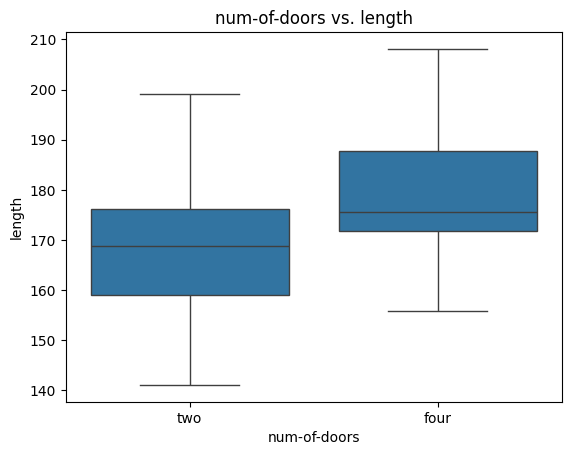

In [98]:
# Relationship between `num-of-doors` and `length`
bivariate_categorical_numerical(data=automobile, x='num-of-doors', y='length', x_order=['two','four'])

The boxplot displays the distribution of vehicle lengths segmented by the number of doors (two or four). Vehicles with four doors tend to have a higher length than those with two doors, which is consistent with common automotive design, as four-door vehicles are often designed to provide more passenger space.

We can take advantage of this observation to build a logistic regression model for the binary classification problem. The model use `length` as the feature and `num-of-doors` as the target. The histogram of `length` suggests that `length` is quite normality-like. We can directly use `length` values in our logistic regression.

Step 1: Data Preparation

We will filter out rows with missing `num-of-doors` to create a training dataset. Only rows with non-null `num-of-doors` values are kept. We also create a test feature set from the 'length' column where `num-of-doors` is missing, i.e., we will predict `num-of-doors` for these entries.

In [99]:
# Filter rows where 'num-of-doors' is not missing
train_data = automobile.dropna(subset=['num-of-doors'])

# Create training and test sets
X_train = train_data[['length']]
y_train = train_data['num-of-doors']
X_test = automobile.loc[automobile['num-of-doors'].isna(), ['length']]

Step 2: Training

We will fit the logistic regression model using the training feature set (`X_train`) and target variable (`y_train`).

In [100]:
# Initialize and fit the logistic regression model
logistic_regression = sklearn.linear_model.LogisticRegression()
logistic_regression.fit(X_train, y_train)

LogisticRegression()

Step 3: Prediction and fill missing values

We will use the fitted logistic regression model to predict the `num-of-doors` of entries in the `automobile` DataFrame where `num-of-doors` was missing. The prediction is based on the `length` values.

In [101]:
# Predict
y_pred = logistic_regression.predict(X_test)
y_pred

array(['two', 'four'], dtype=object)

As we can see, the first missing entry is predicted to be 'two' and the other is predicted to be 'four'. We now fill in the missing `num-of-doors` values with these predictions.

In [102]:
# fill the missing values in the original DataFrame
automobile.loc[X_test.index, 'num-of-doors'] = y_pred

In [103]:
# have a look at the newly-filled values
automobile.loc[X_test.index, ['length', 'num-of-doors']]

,length,num-of-doors
27,157.3,two
63,177.8,four


Now `num-of-doors` has no missing values

In [104]:
automobile['num-of-doors'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: num-of-doors
Non-Null Count  Dtype 
--------------  ----- 
205 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


We have now successfully imputed the missing values in the `num-of-doors` column using a logistic regression.

Show the distribution of `num-of-doors` after all missing values are filled

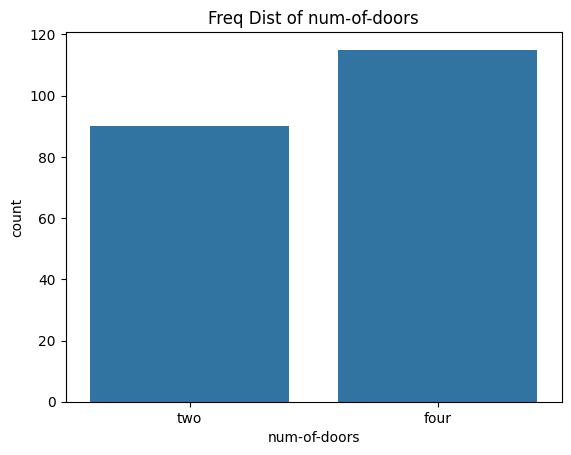

In [105]:
summary = automobile['num-of-doors'].value_counts().reindex(['two','four']).fillna(0)
univariate_categorical(summary)

#### 2.2. Numerical Feature: `price`

`price` is a continuous numerical feature ranging from 5118 to 45400. To find the most appropriate values for 4 missing data points, we can leverage the relationship found in our EDA step between `horsepower` and `price`

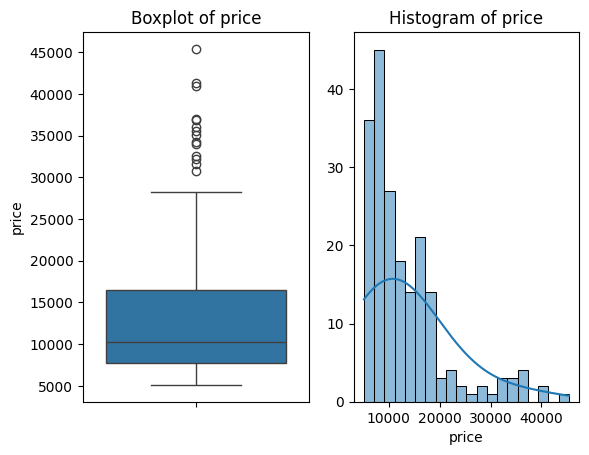

In [106]:
# Distribution of `price`
univariate_numerical(automobile['price'])

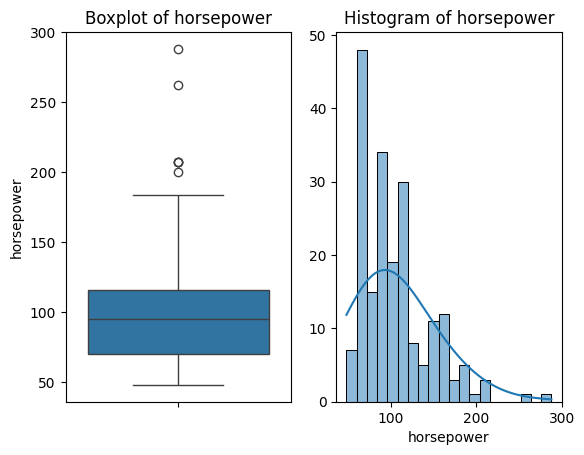

In [107]:
# Distribution of `horsepower`
univariate_numerical(automobile['horsepower'])

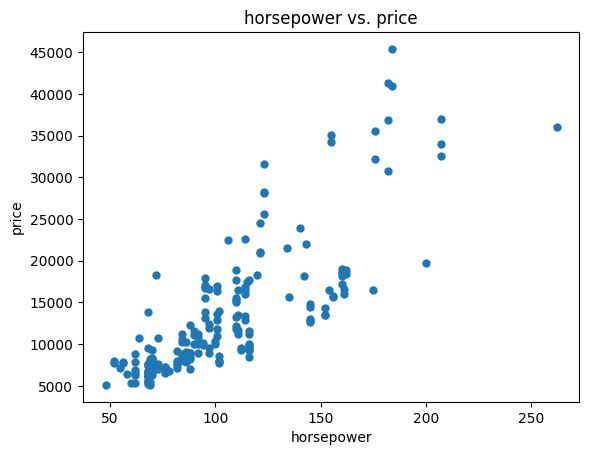

In [108]:
# Relationship between `horsepower` and `price`
bivariate_numerical_numerical(data=automobile, x='horsepower', y='price')

The scatter plot suggests a positive correlation: as `horsepower` increases, the `price` of the vehicle tends to increase as well. This pattern is consistent with market expectations where vehicles with higher performance are usually priced higher.

We can build a simple linear regression to predict the missing `price` instances. However, our EDA early showed that `horsepower` is heavily right-skewed. It's a good idea to transform `horsepower` values so that it better approximates a bell-shaped distribution and centers at 0 with the standard deviation of 1. This transformation will make the Linear Regression model less vulnerable to biased and unstable parameters.

Step 1: Data Preparation

Since the `horsepower` feature itself contains some missing values but there are none of the instances has both `horsepower` and `price` missing, we should drop all instances with missing value in either `horsepower` and `price` from the data that is fed to the linear regression.

In [109]:
subset = automobile[['horsepower','price']].dropna(axis=0, how='any')
X_train = subset[['horsepower']]
y_train = subset[['price']]
X_train.shape

(199, 1)

There are 199 instances that will be used to train the Linear Regression.

We also set aside all `horsepower` values that are associated with missing `price` values. We will use these `horsepower` values to predict the missing `price` values.

In [110]:

X_test = automobile.loc[automobile['price'].isna(), ['horsepower']]

Step 2: Training

We will create a pipeline which has the Power Transform as the preprocessing step. This transformation improves the symmetricity of the distribution and also standardizes the values around 0 with the standard deviation of 1. A simple linear regression will also be added to pipeline as the predictor.

In [111]:
# Create the pipeline
pipeline = sklearn.pipeline.Pipeline(
    steps=[
        ('preprocessing', sklearn.preprocessing.PowerTransformer(method='box-cox', standardize=True)),
        ('linear_regression', sklearn.linear_model.LinearRegression())
    ]
)


In [112]:
# Fit the pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing', PowerTransformer(method='box-cox')),
                ('linear_regression', LinearRegression())])

Step 3: Prediction and fill missing values

We will use the fitted linear regression model to predict the `price` of entries in the `automobile` DataFrame where `price` was missing. The prediction is based on the `horsepower` values.

In [113]:
y_pred = pipeline.predict(X_test)
y_pred

array([[21698.18460502],
       [ 7210.46311509],
       [ 7210.46311509],
       [28775.20944447]])

We now fill in the missing `prices` values with these predictions.

In [114]:
# save the mask of missing price instances
missing_price_mask = automobile['price'].isna()
# fill the missing values with predicted values
automobile.loc[missing_price_mask, 'price'] = y_pred

In [115]:
# have a look at the newly-filled values
automobile.loc[missing_price_mask, ['horsepower', 'price']]

,horsepower,price
9,160.0,21698.184605
44,70.0,7210.463115
45,70.0,7210.463115
129,288.0,28775.209444


Now, `price` has no missing values

In [116]:
automobile['price'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: price
Non-Null Count  Dtype  
--------------  -----  
205 non-null    float64
dtypes: float64(1)
memory usage: 1.7 KB


Show the distribution of `price` after all missing values are filled

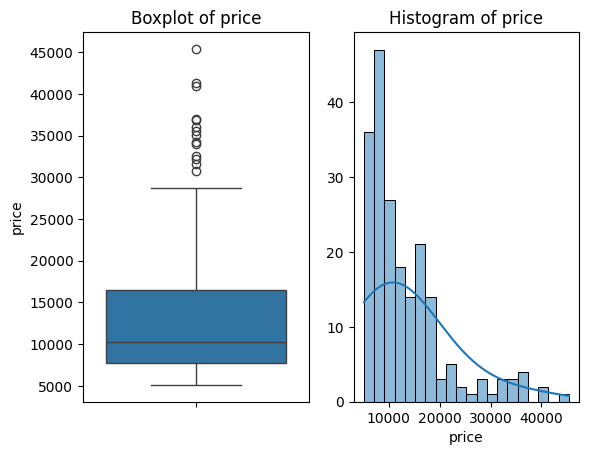

In [117]:
univariate_numerical(automobile['price'])

As can be observed, the distribution of `price` is not affected by the imputation. No bias was introduced.

### Question 3:

First look at the distribution of both features: `engine-size` and `stroke`

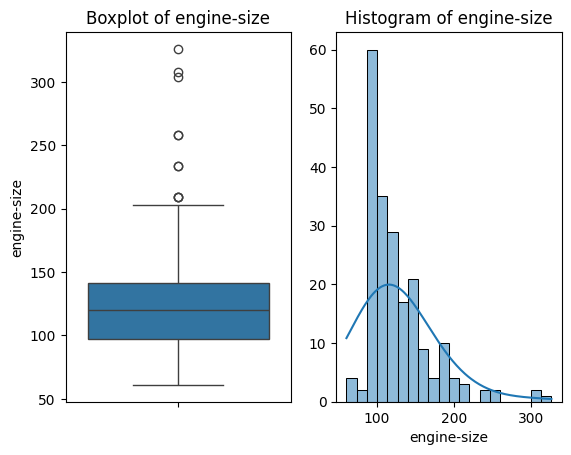

In [118]:
# Distribution of `engine-size`
univariate_numerical(automobile['engine-size'])

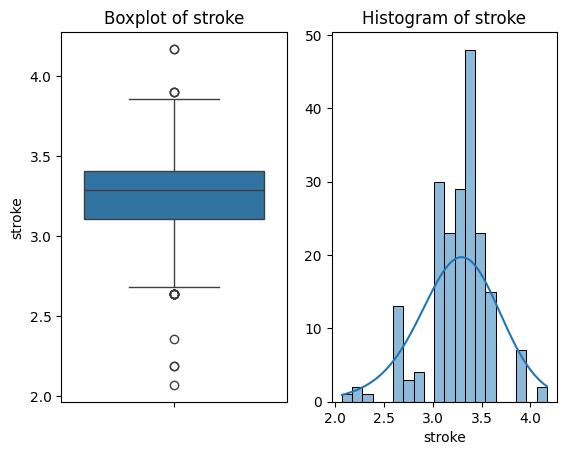

In [119]:
# Distribution of `stroke`
univariate_numerical(automobile['stroke'])

Looking at the histograms, it seems that none of the features approximates a normal distribution. Indeed, using the D’Agostino and Pearson’s normality test at $\alpha=5\%$ on each the feature, we can reject the null hypothesis that the variable is comming from a normal distribution:

In [120]:
def test_for_normality(x: pd.Series, alpha: float = 0.05) -> None:
    _, pvalue = scipy.stats.normaltest(x, nan_policy='omit')
    if pvalue > alpha:
        print(f'{x.name:<20} follows a normal distribution (fail to reject H0)')
    else:
        print(f'{x.name:<20} does not follow a normal distribution (reject H0)')

In [121]:
test_for_normality(automobile['engine-size'])
test_for_normality(automobile['stroke'])

engine-size          does not follow a normal distribution (reject H0)
stroke               does not follow a normal distribution (reject H0)


Because both `engine-size` and `stroke` are positive measures, one common method to remedy the non-normality is Box-Cox transformation:

In [122]:
boxcox = sklearn.preprocessing.PowerTransformer(method='box-cox', standardize=True)

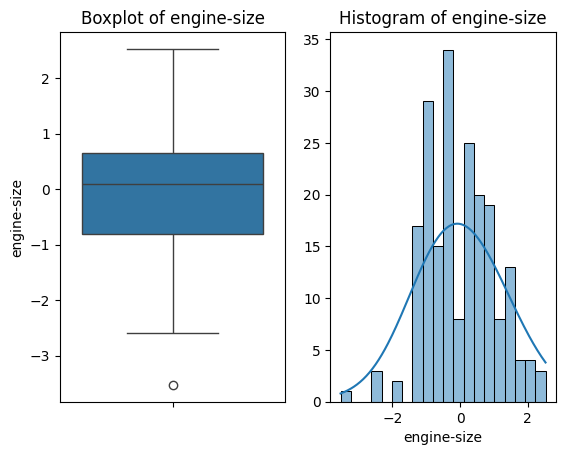

In [123]:
# calculate the transformed values of `engine-size`
transformed_engine_size = boxcox.fit_transform(automobile[['engine-size']]).reshape(-1)
# replace the original `engine-size` values in the dataset with the transformed values
automobile['engine-size'] = transformed_engine_size
# plot the boxplot and histogram of `engine-size`
# in the plot, prepend the feature name with 'transform_' to emphasize this is the transformed values
univariate_numerical(pd.Series(transformed_engine_size.reshape(-1), name='engine-size'))


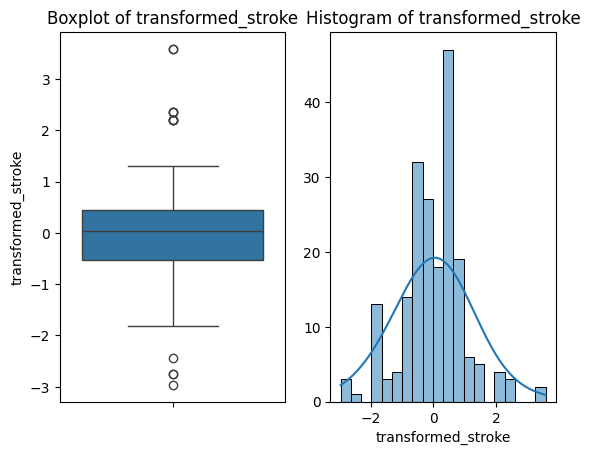

In [124]:
# calculate the transformed values of `stroke`
transformed_stroke = boxcox.fit_transform(automobile[['stroke']]).reshape(-1)
# replace the original `stroke` values in the dataset with the transformed values
automobile['stroke'] = transformed_stroke
# plot the boxplot and histogram of `stroke`
# in the plot, prepend the feature name with 'transform_' to emphasize this is the transformed values
univariate_numerical(pd.Series(transformed_stroke, name='transformed_stroke'))

Now, the histograms of both features look better. We'd want to rerun the D’Agostino and Pearson’s normality test:

In [125]:
test_for_normality(automobile['engine-size'])
test_for_normality(automobile['stroke'])

engine-size          follows a normal distribution (fail to reject H0)
stroke               does not follow a normal distribution (reject H0)


The Box-Cox transformation is intended to stabilize variance and make a skewed distribution as close to normal as possible by applying a power transformation. For the `engine-size` variable, this method seems to have worked effectively, suggesting that the original distribution of `engine-size` was amenable to such a transformation. This could mean that `engine-size` had a unimodal distribution with skewness that could be corrected with an appropriate $\lambda$ value.

However, in the case of `stroke`, the Box-Cox transformation was not successful in normalizing the distribution. The presence of a concentration of extremely small values, particularly in the narrow range of 2.6 to 2.7, could be a significant factor. Such a clustering of values at the low end of the scale might cause a skew that is resistant to the Box-Cox transformation. Even more challenging for the transformation is if these values contribute to a bimodal distribution - where there are two distinct peaks or modes in the data.

Bimodal distributions represent a mixture of two different underlying distributions, which may arise from different populations. If `stroke` is indeed bimodal, then the Box-Cox transformation, which is a unimodal transformation method, would struggle to normalize it since it cannot reconcile two separate clusters of data into a single bell-shaped curve. The transformation attempts to "stretch" or "squeeze" the distribution along the axis of values but cannot fundamentally alter its multimodal nature.

### Question 4:

##### 4A:

- `symboling`: (categorical/ordinal) The symboling attribute in automobile datasets typically relates to the insurance risk rating of a car, with a higher number indicating a riskier or sportier vehicle. This is inherently an ordinal variable since the risk rating has a natural order.
- `make`: (categorical/nominal) The make of a car represents the brand and is a nominal variable since there's no intrinsic order to car brands.
- `engine-type`: (categorical/nominal) Engine type is a nominal variable as there is no ranked order to these types.

##### 4B:

Check for missing values

In [126]:
automobile[['symboling','make','engine-type']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   symboling    205 non-null    object
 1   make         205 non-null    object
 2   engine-type  205 non-null    object
dtypes: object(3)
memory usage: 4.9+ KB


As we can see, there is no need for handling missing values because missing values are absence in both of the features. Our only job is encoding these categoical features in a numerical format such that machine learning algorithms can manage.

Categorical/Ordinal Feature `symboling`:

Given that there are just seven categories in the symboling feature, representing risk levels, we can effectively map each category to an integer that mirrors its inherent order. This task is further simplified by the fact that the categories are already represented as number-like strings ("-3", "-2", "-1", "0", "1", "2", "3"), directly indicating their order. Hence, we can employ a straightforward conversion function to transform these string representations into integers. This method not only preserves the ordinal nature of the symboling attribute but also seamlessly converts it into a numerical format that is readily compatible with machine learning algorithms.

Categorical/Nominal Features `make` and `engine-type`:

In this case, handling missing values is not necessary as both the `make` and `engine-type` features are free from missing data. Therefore, our primary task is to encode these categorical features into a numerical format that is suitable for machine learning algorithms. This encoding process transforms the categorical data into a numerical form, enabling effective model training and evaluation.

##### 4C:

<b>Categorical/Ordinal Feature `symboling`:</b>

In [127]:
# map the ordinal, number-like categories to integers
automobile['symboling'] = automobile['symboling'].map(int)
# display the first 5 samples of `symboling`
automobile[['symboling']].head(5)

,symboling
0,3
1,3
2,1
3,2
4,2


The `symboling` feature is now decoded as integers that preserve the ordinal information of the risk ratings

<b>Categorical/Nominal Features `make` and `engine-type`:</b>

In [128]:
# initialize the OneHotEncoder
encoder = sklearn.preprocessing.OneHotEncoder(sparse=False, drop=None)
# apply the OneHotEncoder to the 'make' and 'engine-type' columns
encoded = encoder.fit_transform(automobile[['make','engine-type']])
# display the transformed data.
encoded

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [129]:
# display the names of the new features
encoder.get_feature_names_out()

array(['make_alfa-romero', 'make_audi', 'make_bmw', 'make_chevrolet',
       'make_dodge', 'make_honda', 'make_isuzu', 'make_jaguar',
       'make_mazda', 'make_mercedes-benz', 'make_mercury',
       'make_mitsubishi', 'make_nissan', 'make_peugot', 'make_plymouth',
       'make_porsche', 'make_renault', 'make_saab', 'make_subaru',
       'make_toyota', 'make_volkswagen', 'make_volvo', 'engine-type_dohc',
       'engine-type_dohcv', 'engine-type_l', 'engine-type_ohc',
       'engine-type_ohcf', 'engine-type_ohcv', 'engine-type_rotor'],
      dtype=object)

In [130]:
# create a DataFrame contains all encoded values of `make` and `engine-size`
transformed_make_engine_type = pd.DataFrame(data=encoded, columns=encoder.get_feature_names_out())
# display the newly-created DataFrame
pd.set_option('display.max_columns', None)
transformed_make_engine_type

,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,engine-type_dohc,engine-type_dohcv,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
202,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
203,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [131]:
# join `automobile` with `transformed_make_engine_type` 
automobile = automobile.join(other=transformed_make_engine_type) # join on index
# drop original columns
automobile = automobile.drop(labels=['make','engine-type'], axis=1)

In [132]:
# display the first 5 samples of the resulted DataFrame
automobile.head(5)

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,engine-type_dohc,engine-type_dohcv,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor
0,3,NaN,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,four,0.380116,mpfi,3.47,-1.716468,9.0,111.0,5000.0,21,27,13495.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,NaN,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,four,0.380116,mpfi,3.47,-1.716468,9.0,111.0,5000.0,21,27,16500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,NaN,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,six,0.890038,mpfi,2.68,0.663547,9.0,154.0,5000.0,19,26,16500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2,164.0,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,four,-0.294328,mpfi,3.19,0.414798,10.0,102.0,5500.0,24,30,13950.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2,164.0,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,five,0.535227,mpfi,3.19,0.414798,8.0,115.0,5500.0,18,22,17450.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


`make` and `engine-size` are now decoded by 29 columns of one-hot values. For example, the first sample (indexed at 0) has `make`=`alfa-romero` and `engin-type`=`dohc`, the fifth sample (indexed at 4) has `make`=`audi` and `engine-type`=`ohc`.

### Question 5:

Select the features from the dataset

In [133]:
selected_features = [
    'wheel-base', 'length', 'width', 
    'height', 'curb-weight', 'engine-size', 
    'compression-ratio', 'horsepower', 
    'peak-rpm', 'city-mpg'
]

Let's check for missing values in the subset:

In [134]:
automobile[selected_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   wheel-base         205 non-null    float64
 1   length             205 non-null    float64
 2   width              205 non-null    float64
 3   height             205 non-null    float64
 4   curb-weight        205 non-null    int64  
 5   engine-size        205 non-null    float64
 6   compression-ratio  205 non-null    float64
 7   horsepower         203 non-null    float64
 8   peak-rpm           203 non-null    float64
 9   city-mpg           205 non-null    int64  
dtypes: float64(8), int64(2)
memory usage: 16.1 KB


`horsepower` and `peak-rpm` have 2 missing values each.

Let's inspect some mutual relationships:

`price` vs. `horsepower`:

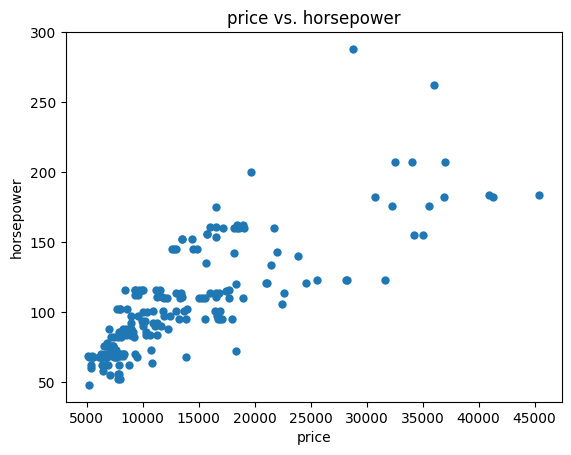

In [135]:
bivariate_numerical_numerical(data=automobile, x='price', y='horsepower')

`engine-size` vs. `peak-rpm`:

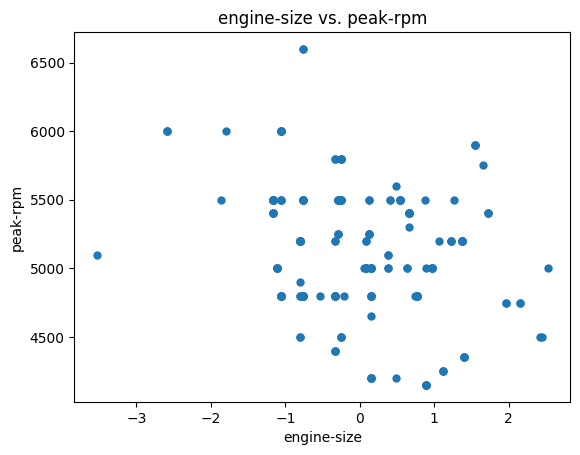

In [136]:
bivariate_numerical_numerical(data=automobile, x='engine-size', y='peak-rpm')
# NOTE: `engine-size` has been previously scaled

As a result, we can use `price` to estimate missing `horsepower`, and use `engine-size` to estimate missing `peak-rpm`.

<b>Fill in missing `horsepower`:</b>

In [137]:
# create a pipeline to transform `price` and make prediction on `horsepower`
pipeline = sklearn.pipeline.Pipeline(
    steps=[
        ('preprocessing', sklearn.preprocessing.PowerTransformer(method='box-cox', standardize=True)),
        ('linear_regression', sklearn.linear_model.LinearRegression())
    ]
)

# prepare the data
subset = automobile[['price','horsepower']].dropna(axis=0, how='any')
X_train = automobile.loc[subset.index, ['price']]
y_train = automobile.loc[subset.index, 'horsepower']
X_test = automobile.loc[automobile['horsepower'].isna(), ['price']]

# fit the pipeline and fill in missing values
pipeline.fit(X_train, y_train)
automobile.loc[automobile['horsepower'].isna(), 'horsepower'] = pipeline.predict(X_test)

In [138]:
# check for missing values
automobile['horsepower'].isna().any()

False

<b>Fill in missing `peak-rpm`:</b>

In [139]:
# create a linear regression to make prediction on `peak-rpm`
linear_regression = sklearn.linear_model.LinearRegression()

# prepare the data
subset = automobile[['engine-size','peak-rpm']].dropna(axis=0, how='any')
X_train = automobile.loc[subset.index, ['engine-size']]
y_train = automobile.loc[subset.index, 'peak-rpm']
X_test = automobile.loc[automobile['peak-rpm'].isna(), ['engine-size']]

# fit the model and fill in missing values
linear_regression.fit(X_train, y_train)
automobile.loc[automobile['peak-rpm'].isna(), 'peak-rpm'] = linear_regression.predict(X_test)

In [140]:
# check for missing values
automobile['horsepower'].isna().any()

False

In [141]:
automobile[selected_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   wheel-base         205 non-null    float64
 1   length             205 non-null    float64
 2   width              205 non-null    float64
 3   height             205 non-null    float64
 4   curb-weight        205 non-null    int64  
 5   engine-size        205 non-null    float64
 6   compression-ratio  205 non-null    float64
 7   horsepower         205 non-null    float64
 8   peak-rpm           205 non-null    float64
 9   city-mpg           205 non-null    int64  
dtypes: float64(8), int64(2)
memory usage: 16.1 KB


##### Dimensional Reduction with PCA

In [142]:
# iitialize PCA
pca = sklearn.decomposition.PCA(n_components=0.9)

The `n_components`=0.9 parameter specifies that the number of components should be chosen such that at least 90% of the variance is retained.

In [143]:
# fit and transform
principal_components = pca.fit_transform(X=automobile[selected_features])
# show the first 5 rows of the principal components
principal_components[:5]

array([[  66.68627015, -105.30239109],
       [  66.68627015, -105.30239109],
       [ 291.42909877,   57.03050471],
       [-396.16100952,  177.66825151],
       [  -0.5365517 ,  461.21547759]])

The above code applies PCA to the specified features. The `fit_transform` method first fits the PCA model to the data and then transforms the data into principal components. The resulted `principal_components` is a NumPy array where each row represents the original data transformed into the principal components space.

In [144]:
# number of components
pca.n_components_

2

In [145]:
# percentage of retained information per each principal component
pca.explained_variance_ratio_

array([0.63830298, 0.36054672])

In [146]:
# total percentage of retained information
pca.explained_variance_ratio_.sum()

0.9988496993711999

The PCA analysis on the selected 10 features in `automobile` dataset with `pca.n_components_` returning 2 indicates that 10 original features have been effectively reduced to just 2 principal components. These 2 components together account for approximately 99.88% of the total variance as evidenced by the sum of the `explained_variance_ratio_`. 

Specifically, the first principal component explains about 63.83% of the variance, while the second accounts for 36.05%. This significant reduction in dimensionality, while still retaining most of the variance, suggests that 10 original features had considerable redundancy or correlation.

---

Reference:
- D’Agostino, R. and Pearson, E.S., 1973. Tests for departure from normality. Biometrika, 60, pp.613-622.
- SciPy Documentation, no date. scipy.stats.normaltest. [online] Available at: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html 

Github repository: https://github.com/dangvohiep/dam_project2

---